In [1]:
import os
import pandas as pd
from scipy.stats import mannwhitneyu
from statsmodels.stats.multitest import multipletests
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cwd = os.getcwd()
path = cwd + "\output"
if not os.path.exists(path):
    os.mkdir(path)

df = pd.read_csv('taxa4FDR.txt', delimiter = "\t")
y = list(df.iloc[:, 0])
df.drop([df.columns[0]], axis=1, inplace=True)
df = df.transpose()
df = df.loc[(df!=0).any(axis=1)]
groupsize = (len(y)/2)

In [3]:
# First calcuate p-value from Mann-Whitney U rank test on two independent samples
dfMWUdata = pd.DataFrame()
indexlist = []
MWUstatlist = []
MWUpvallist = []

for index, row in df.iterrows():
    row = pd.Series(row)
    controls = []
    cases = []
    for i in range(int(groupsize)):
        cases.append(row[i])
        controls.append(row[i+groupsize])
    MWUstat, MWUpval = mannwhitneyu(cases, controls, method="exact")
    indexlist.append(index)
    MWUstatlist.append(MWUstat)
    MWUpvallist.append(MWUpval)
    print(index, 'with a p-value of', MWUpval)

dfMWUdata['Index'] = indexlist
dfMWUdata['MWUstat'] = MWUstatlist
dfMWUdata['MWUpval'] = MWUpvallist

s__Candidatus_Babela_massiliensis with a p-value of 0.6959975005551706
s__Thermobaculum_terrenum with a p-value of 2.2038238923005368e-10
s__Vampirococcus_sp._LiM with a p-value of 0.03711403333016974
s__Acidisarcina_polymorpha with a p-value of 0.07358960918191489
s__Acidobacterium_capsulatum with a p-value of 0.9875381448031963
s__Candidatus_Koribacter_versatilis with a p-value of 0.4618708408677939
s__Granulicella_tundricola with a p-value of 0.06368232173904889
s__Terriglobus_albidus with a p-value of 2.2038238923005368e-10
s__Terriglobus_roseus with a p-value of 0.022359370223383888
s__Terriglobus_saanensis with a p-value of 0.05487635980479541
s__Candidatus_Solibacter_usitatus with a p-value of 0.44294369583668897
s__Chloracidobacterium_thermophilum with a p-value of 0.0907075699466431
s__Luteitalea_pratensis with a p-value of 0.00576100016933081
s__Acidimicrobium_ferrooxidans with a p-value of 0.7427977872682514
s__Iamiaceae_bacterium_SCSIO_58843 with a p-value of 0.034206971437

s__Corynebacterium_simulans with a p-value of 0.03149170194740788
s__Corynebacterium_singulare with a p-value of 0.003723198044220895
s__Corynebacterium_sp._1959 with a p-value of 0.002641982869390389
s__Corynebacterium_sp._2019 with a p-value of 0.11079554703718851
s__Corynebacterium_sp._2039 with a p-value of 0.007104922171243002
s__Corynebacterium_sp._2183 with a p-value of 0.8390690626948557
s__Corynebacterium_sp._2184 with a p-value of 0.9875381448031963
s__Corynebacterium_sp._ATCC_6931 with a p-value of 0.6502995445147797
s__Corynebacterium_sp._LMM_1652 with a p-value of 0.007104922171243002
s__Corynebacterium_sp._NML98-0116 with a p-value of 0.2930927409974813
s__Corynebacterium_sp._sy039 with a p-value of 0.42445687592117765
s__Corynebacterium_sphenisci with a p-value of 0.3078733287866242
s__Corynebacterium_stationis with a p-value of 0.0005779640552576665
s__Corynebacterium_striatum with a p-value of 0.3078733287866242
s__Corynebacterium_terpenotabidum with a p-value of 0.084

s__Rhodococcus_sp._NJ-530 with a p-value of 0.8635695190131213
s__Rhodococcus_sp._P1Y with a p-value of 0.13413949608001985
s__Rhodococcus_sp._PBTS_1 with a p-value of 0.7427977872682514
s__Rhodococcus_sp._PBTS_2 with a p-value of 0.024401295041849128
s__Rhodococcus_sp._S2-17 with a p-value of 0.015572731130521
s__Rhodococcus_sp._SGAir0479 with a p-value of 0.1916374156978133
s__Rhodococcus_sp._WB1 with a p-value of 0.03711403333016974
s__Rhodococcus_sp._WB9 with a p-value of 0.3550448798267503
s__Rhodococcus_sp._WMMA185 with a p-value of 0.4812295153329559
s__Rhodococcus_sp._X156 with a p-value of 0.03711403333016974
s__Rhodococcus_sp._YL-1 with a p-value of 0.020463641351991746
s__Rhodococcus_sp._p52 with a p-value of 0.5627774303265758
s__Segniliparus_rotundus with a p-value of 0.05914717921616
s__Tsukamurella_paurometabola with a p-value of 0.7192694751338857
s__Tsukamurella_tyrosinosolvens with a p-value of 0.4812295153329559
s__Lawsonella_clevelandensis with a p-value of 0.987538

s__Xylanimonas_cellulosilytica with a p-value of 0.37170655384058016
s__Haloactinobacterium_sp._HY164 with a p-value of 0.3550448798267503
s__Ruania_sp._HY168 with a p-value of 0.22623256647203924
s__Sanguibacter_keddieii with a p-value of 0.002085590944302506
s__Luteimicrobium_xylanilyticum with a p-value of 0.18099571209698656
s__Tropheryma_whipplei with a p-value of 0.5010105942993488
s__Actinoplanes_derwentensis with a p-value of 0.03149170194740788
s__Actinoplanes_friuliensis with a p-value of 0.4812295153329559
s__Actinoplanes_missouriensis with a p-value of 0.022359370223383888
s__Actinoplanes_sp._N902-109 with a p-value of 0.22623256647203924
s__Actinoplanes_sp._OR16 with a p-value of 0.005176615713927704
s__Actinoplanes_teichomyceticus with a p-value of 0.05914717921616
s__Micromonospora_aurantiaca with a p-value of 0.005176615713927704
s__Micromonospora_auratinigra with a p-value of 0.020463641351991746
s__Micromonospora_chokoriensis with a p-value of 0.9875381448031963
s__Mi

s__Streptomyces_sp._RLB3-17 with a p-value of 0.047084832112640786
s__Streptomyces_sp._RLB3-5 with a p-value of 1.0
s__Streptomyces_sp._RLB3-6 with a p-value of 0.0907075699466431
s__Streptomyces_sp._RTd22 with a p-value of 0.5417964849515796
s__Streptomyces_sp._S063 with a p-value of 0.42445687592117765
s__Streptomyces_sp._S1A1-7 with a p-value of 0.11079554703718851
s__Streptomyces_sp._S1D4-14 with a p-value of 0.12597937840111317
s__Streptomyces_sp._S1D4-20 with a p-value of 0.05085920250687612
s__Streptomyces_sp._S1D4-23 with a p-value of 0.018705941276710224
s__Streptomyces_sp._S501 with a p-value of 0.40641750564313894
s__Streptomyces_sp._S8 with a p-value of 0.9875381448031963
s__Streptomyces_sp._SAT1 with a p-value of 0.6730014746997764
s__Streptomyces_sp._SCSIO_03032 with a p-value of 0.1610068266420226
s__Streptomyces_sp._SGAir0924 with a p-value of 0.22623256647203924
s__Streptomyces_sp._SM17 with a p-value of 0.07358960918191489
s__Streptomyces_sp._SM18 with a p-value of 0.

s__Barnesiella_viscericola with a p-value of 0.5627774303265758
s__Proteiniphilum_saccharofermentans with a p-value of 0.15164410849059184
s__Duncaniella_sp._B8 with a p-value of 1.3523324550323783e-05
s__Duncaniella_sp._C9 with a p-value of 0.002349231972332138
s__Muribaculum_intestinale with a p-value of 0.07898371388468445
s__Muribaculum_sp._H5 with a p-value of 0.2515766913139025
s__Muribaculum_sp._TLL-A4 with a p-value of 0.00021050815628060113
s__Muribaculaceae_bacterium_DSM_108610 with a p-value of 0.003723198044220895
s__Butyricimonas_faecalis with a p-value of 0.009630882527999337
s__Odoribacter_splanchnicus with a p-value of 0.5010105942993488
s__Paludibacter_propionicigenes with a p-value of 0.2649459873066575
s__Fermentimonas_caenicola with a p-value of 0.79054385580345
s__Petrimonas_mucosa with a p-value of 0.034206971437659994
s__Porphyromonas_asaccharolytica with a p-value of 0.022359370223383888
s__Porphyromonas_cangingivalis with a p-value of 0.04022258467044563
s__Por

s__Blattabacterium_punctulatus with a p-value of 0.03711403333016974
s__Blattabacterium_sp._(Blaberus_giganteus) with a p-value of 0.6730014746997764
s__Blattabacterium_sp._(Blatta_orientalis) with a p-value of 0.27878391256601975
s__Blattabacterium_sp._(Blattella_germanica) with a p-value of 0.05914717921616
s__Blattabacterium_sp._(Cryptocercus_kyebangensis) with a p-value of 0.5841331044397761
s__Blattabacterium_sp._(Mastotermes_darwiniensis) with a p-value of 0.7192694751338857
s__Blattabacterium_sp._(Nauphoeta_cinerea) with a p-value of 0.018705941276710224
s__Blattabacterium_sp._(Periplaneta_americana) with a p-value of 0.07358960918191489
s__Fluviicola_taffensis with a p-value of 0.38883235162345176
s__Owenweeksia_hongkongensis with a p-value of 0.44294369583668897
s__Aequorivita_sp._H23M31 with a p-value of 0.03149170194740788
s__Aequorivita_sublithincola with a p-value of 0.6959975005551706
s__Algibacter_alginicilyticus with a p-value of 0.3550448798267503
s__Antarcticibacteriu

s__Lacinutrix_venerupis with a p-value of 0.37170655384058016
s__Lutibacter_profundi with a p-value of 0.07898371388468445
s__Lutibacter_sp._LPB0138 with a p-value of 0.11079554703718851
s__Maribacter_cobaltidurans with a p-value of 0.13413949608001985
s__Maribacter_sp._1_2014MBL_MicDiv with a p-value of 0.627909807361219
s__Maribacter_sp._HTCC2170 with a p-value of 0.5417964849515796
s__Maribacter_sp._MAR_2009_60 with a p-value of 0.2515766913139025
s__Maribacter_sp._MJ134 with a p-value of 0.1707881003162564
s__Maribacter_sp._T28 with a p-value of 0.5417964849515796
s__Mariniflexile_sp._TRM1-10 with a p-value of 0.37170655384058016
s__Muricauda_lutaonensis with a p-value of 0.37170655384058016
s__Muricauda_ruestringensis with a p-value of 0.03711403333016974
s__Muriicola_sp._MMS17-SY002 with a p-value of 0.42445687592117765
s__Myroides_odoratimimus with a p-value of 0.11079554703718851
s__Myroides_odoratus with a p-value of 0.004644855708101675
s__Myroides_profundi with a p-value of 

s__Oscillatoria_nigro-viridis with a p-value of 0.020463641351991746
s__Oscillatoriales_cyanobacterium_JSC-12 with a p-value of 0.79054385580345
s__Stanieria_cyanosphaera with a p-value of 0.6730014746997764
s__Stanieria_sp._NIES-3757 with a p-value of 0.8147199233492418
s__Pleurocapsa_minor with a p-value of 0.4812295153329559
s__Acaryochloris_marina with a p-value of 0.3550448798267503
s__Chamaesiphon_minutus with a p-value of 0.18099571209698656
s__Leptolyngbya_boryana with a p-value of 0.3388504947138363
s__Leptolyngbya_sp._NIES-3755 with a p-value of 0.3388504947138363
s__Leptolyngbya_sp._O-77 with a p-value of 0.27878391256601975
s__Leptolyngbya_sp._PCC_7376 with a p-value of 0.11079554703718851
s__Synechocystis_sp._PCC_6714 with a p-value of 0.20271990743763343
s__Synechocystis_sp._PCC_6803 with a p-value of 0.79054385580345
s__Prochlorococcus_marinus with a p-value of 0.06368232173904889
s__Prochlorococcus_sp._MIT_0604 with a p-value of 0.5417964849515796
s__Prochlorococcus_sp.

s__Bacillus_foraminis with a p-value of 0.0265980933639634
s__Bacillus_freudenreichii with a p-value of 0.27878391256601975
s__Bacillus_glycinifermentans with a p-value of 0.22623256647203924
s__Bacillus_gobiensis with a p-value of 0.5627774303265758
s__Bacillus_halodurans with a p-value of 0.3078733287866242
s__Bacillus_halotolerans with a p-value of 0.14269122885694055
s__Bacillus_horikoshii with a p-value of 0.15164410849059184
s__Bacillus_infantis with a p-value of 0.07898371388468445
s__Bacillus_intestinalis with a p-value of 0.8635695190131213
s__Bacillus_jeotgali with a p-value of 0.5417964849515796
s__Bacillus_kochii with a p-value of 0.5841331044397761
s__Bacillus_krulwichiae with a p-value of 0.1610068266420226
s__Bacillus_lehensis with a p-value of 0.028958488585839597
s__Bacillus_lentus with a p-value of 0.1707881003162564
s__Bacillus_licheniformis with a p-value of 0.01707817116511751
s__Bacillus_litoralis with a p-value of 0.05487635980479541
s__Bacillus_luti with a p-val

s__Macrococcus_caseolyticus with a p-value of 0.9377501477030319
s__Macrococcus_sp._IME1552 with a p-value of 0.05914717921616
s__Salinicoccus_halodurans with a p-value of 0.7665628859549894
s__Staphylococcus_agnetis with a p-value of 0.5627774303265758
s__Staphylococcus_argenteus with a p-value of 0.08468598897913951
s__Staphylococcus_arlettae with a p-value of 0.3078733287866242
s__Staphylococcus_aureus with a p-value of 0.5627774303265758
s__Staphylococcus_auricularis with a p-value of 0.37170655384058016
s__Staphylococcus_capitis with a p-value of 0.22623256647203924
s__Staphylococcus_caprae with a p-value of 0.5010105942993488
s__Staphylococcus_carnosus with a p-value of 0.79054385580345
s__Staphylococcus_chromogenes with a p-value of 0.05914717921616
s__Staphylococcus_cohnii with a p-value of 0.42445687592117765
s__Staphylococcus_condimenti with a p-value of 0.09705913695854208
s__Staphylococcus_delphini with a p-value of 0.7427977872682514
s__Staphylococcus_epidermidis with a p-

s__Streptococcus_parasanguinis with a p-value of 0.06849286555540389
s__Streptococcus_parauberis with a p-value of 0.3388504947138363
s__Streptococcus_pasteurianus with a p-value of 0.6959975005551706
s__Streptococcus_pluranimalium with a p-value of 0.03711403333016974
s__Streptococcus_pneumoniae with a p-value of 0.2930927409974813
s__Streptococcus_porcinus with a p-value of 0.8881983690094404
s__Streptococcus_pseudopneumoniae with a p-value of 0.8390690626948557
s__Streptococcus_pseudoporcinus with a p-value of 0.07358960918191489
s__Streptococcus_pyogenes with a p-value of 0.627909807361219
s__Streptococcus_ratti with a p-value of 0.5010105942993488
s__Streptococcus_respiraculi with a p-value of 0.11820145204887467
s__Streptococcus_ruminantium with a p-value of 0.6959975005551706
s__Streptococcus_salivarius with a p-value of 0.3078733287866242
s__Streptococcus_sanguinis with a p-value of 0.0265980933639634
s__Streptococcus_sobrinus with a p-value of 0.23867350583742808
s__Streptococ

s__Herbinix_luporum with a p-value of 0.07358960918191489
s__Lachnoanaerobaculum_umeaense with a p-value of 0.20271990743763343
s__Lachnoclostridium_phocaeense with a p-value of 0.5627774303265758
s__Lachnoclostridium_phytofermentans with a p-value of 0.14269122885694055
s__Lachnoclostridium_sp._YL32 with a p-value of 0.6959975005551706
s__Clostridium_bolteae with a p-value of 0.5010105942993488
s__Clostridium_hylemonae with a p-value of 0.38883235162345176
s__Clostridium_saccharolyticum with a p-value of 0.04022258467044563
s__Clostridium_scindens with a p-value of 0.5841331044397761
s__Clostridium_sphenoides with a p-value of 0.4618708408677939
s__Pseudobutyrivibrio_xylanivorans with a p-value of 0.07898371388468445
s__Roseburia_hominis with a p-value of 0.9129330964354877
s__Roseburia_intestinalis with a p-value of 0.2649459873066575
s__Lachnospiraceae_bacterium with a p-value of 0.42445687592117765
s__Lachnospiraceae_bacterium_Choco86 with a p-value of 0.5417964849515796
s__Lachnos

s__Erysipelotrichaceae_bacterium_GAM147 with a p-value of 0.6959975005551706
s__Erysipelotrichaceae_bacterium_I46 with a p-value of 0.09705913695854208
s__Limnochorda_pilosa with a p-value of 0.005176615713927704
s__Acidaminococcus_fermentans with a p-value of 0.22623256647203924
s__Acidaminococcus_intestini with a p-value of 0.3550448798267503
s__Phascolarctobacterium_faecium with a p-value of 0.07898371388468445
s__Phascolarctobacterium_succinatutens with a p-value of 0.11820145204887467
s__Megamonas_hypermegale with a p-value of 0.9129330964354877
s__Selenomonas_ruminantium with a p-value of 0.27878391256601975
s__Selenomonas_sp._oral_taxon_126 with a p-value of 0.4618708408677939
s__Selenomonas_sp._oral_taxon_136 with a p-value of 0.04354281527901848
s__Selenomonas_sp._oral_taxon_478 with a p-value of 0.5010105942993488
s__Selenomonas_sp._oral_taxon_920 with a p-value of 0.3550448798267503
s__Selenomonas_sputigena with a p-value of 0.22623256647203924
s__Methylomusa_anaerophila wit

s__Bradyrhizobium_diazoefficiens with a p-value of 0.6959975005551706
s__Bradyrhizobium_erythrophlei with a p-value of 0.27878391256601975
s__Bradyrhizobium_guangdongense with a p-value of 0.1916374156978133
s__Bradyrhizobium_guangxiense with a p-value of 0.00576100016933081
s__Bradyrhizobium_guangzhouense with a p-value of 0.011717457920434533
s__Bradyrhizobium_icense with a p-value of 0.007873804151437833
s__Bradyrhizobium_japonicum with a p-value of 0.14269122885694055
s__Bradyrhizobium_lablabi with a p-value of 0.03149170194740788
s__Bradyrhizobium_oligotrophicum with a p-value of 0.14269122885694055
s__Bradyrhizobium_ottawaense with a p-value of 0.07358960918191489
s__Bradyrhizobium_paxllaeri with a p-value of 0.1916374156978133
s__Bradyrhizobium_sp. with a p-value of 0.04354281527901848
s__Bradyrhizobium_sp._58S1 with a p-value of 0.3078733287866242
s__Bradyrhizobium_sp._BTAi1 with a p-value of 0.10375165425908305
s__Bradyrhizobium_sp._CCGE-LA001 with a p-value of 0.0029665997376

s__Agrobacterium_sp._H13-3 with a p-value of 0.8635695190131213
s__Agrobacterium_sp._MA01 with a p-value of 0.3388504947138363
s__Agrobacterium_sp._RAC06 with a p-value of 0.605848848115796
s__Agrobacterium_sp._T29 with a p-value of 0.09705913695854208
s__Agrobacterium_tumefaciens with a p-value of 0.5627774303265758
s__Agrobacterium_vitis with a p-value of 0.37170655384058016
s__Ensifer_adhaerens with a p-value of 0.22623256647203924
s__Ensifer_alkalisoli with a p-value of 0.022359370223383888
s__Ensifer_sojae with a p-value of 0.9129330964354877
s__Georhizobium_profundi with a p-value of 0.79054385580345
s__Candidatus_Liberibacter_africanus with a p-value of 0.44294369583668897
s__Candidatus_Liberibacter_americanus with a p-value of 0.05914717921616
s__Candidatus_Liberibacter_asiaticus with a p-value of 0.3550448798267503
s__Candidatus_Liberibacter_solanacearum with a p-value of 0.9626264785275431
s__Liberibacter_crescens with a p-value of 0.3550448798267503
s__Neorhizobium_galegae w

s__Azospirillum_thiophilum with a p-value of 0.11079554703718851
s__Candidatus_Endolissoclinum_faulkneri with a p-value of 0.8635695190131213
s__Ferrovibrio_sp._K5 with a p-value of 0.009630882527999337
s__Haematospirillum_jordaniae with a p-value of 0.8390690626948557
s__Indioceanicola_profundi with a p-value of 0.11820145204887467
s__Magnetospira_sp._QH-2 with a p-value of 0.022359370223383888
s__Magnetospirillum_gryphiswaldense with a p-value of 0.4812295153329559
s__Magnetospirillum_magneticum with a p-value of 0.3078733287866242
s__Magnetospirillum_sp._ME-1 with a p-value of 0.07358960918191489
s__Magnetospirillum_sp._XM-1 with a p-value of 0.627909807361219
s__Nitrospirillum_amazonense with a p-value of 0.05914717921616
s__Niveispirillum_cyanobacteriorum with a p-value of 0.15164410849059184
s__Pararhodospirillum_photometricum with a p-value of 0.0907075699466431
s__Rhodospirillum_centenum with a p-value of 0.004161628973179056
s__Rhodospirillum_rubrum with a p-value of 0.0155727

s__Sphingobium_japonicum with a p-value of 0.23867350583742808
s__Sphingobium_sp._CAP-1 with a p-value of 0.00871402964096855
s__Sphingobium_sp._EP60837 with a p-value of 0.5010105942993488
s__Sphingobium_sp._LF-16 with a p-value of 0.40641750564313894
s__Sphingobium_sp._MI1205 with a p-value of 0.21424980209385966
s__Sphingobium_sp._PAMC28499 with a p-value of 0.06849286555540389
s__Sphingobium_sp._RAC03 with a p-value of 0.5627774303265758
s__Sphingobium_sp._SCG-1 with a p-value of 0.07898371388468445
s__Sphingobium_sp._SYK-6 with a p-value of 0.42445687592117765
s__Sphingobium_sp._TKS with a p-value of 0.9377501477030319
s__Sphingobium_sp._YBL2 with a p-value of 0.08468598897913951
s__Sphingobium_sp._YG1 with a p-value of 0.2515766913139025
s__Sphingobium_yanoikuyae with a p-value of 0.5841331044397761
s__Sphingomonas_ginsengisoli_An_et_al._2013 with a p-value of 0.8390690626948557
s__Sphingomonas_hengshuiensis with a p-value of 0.4618708408677939
s__Sphingomonas_indica with a p-val

s__Burkholderia_sp._IDO3 with a p-value of 0.1707881003162564
s__Burkholderia_sp._JP2-270 with a p-value of 0.002641982869390389
s__Burkholderia_sp._KBS0801 with a p-value of 0.0009862391803679225
s__Burkholderia_sp._KJ006 with a p-value of 0.40641750564313894
s__Burkholderia_sp._KK1 with a p-value of 0.3550448798267503
s__Burkholderia_sp._LA-2-3-30-S1-D2 with a p-value of 0.006402232923182976
s__Burkholderia_sp._MSMB0266 with a p-value of 0.9875381448031963
s__Burkholderia_sp._MSMB0852 with a p-value of 0.44294369583668897
s__Burkholderia_sp._MSMB0856 with a p-value of 0.4618708408677939
s__Burkholderia_sp._MSMB1588 with a p-value of 0.2649459873066575
s__Burkholderia_sp._MSMB617WGS with a p-value of 0.9875381448031963
s__Burkholderia_sp._NRF60-BP8 with a p-value of 0.6730014746997764
s__Burkholderia_sp._OLGA172 with a p-value of 0.23867350583742808
s__Burkholderia_sp._PAMC_26561 with a p-value of 0.7665628859549894
s__Burkholderia_sp._PAMC_28687 with a p-value of 0.22623256647203924


s__Candidatus_Methylopumilus_universalis with a p-value of 0.23867350583742808
s__Methylobacillus_flagellatus with a p-value of 0.6730014746997764
s__Methylophilus_medardicus with a p-value of 0.5627774303265758
s__Methylophilus_sp._TWE2 with a p-value of 0.00024469475402752396
s__Methylotenera_mobilis with a p-value of 0.605848848115796
s__Methylotenera_versatilis with a p-value of 0.10375165425908305
s__Methylovorus_glucosotrophus with a p-value of 0.007873804151437833
s__Methylovorus_sp._MP688 with a p-value of 0.23867350583742808
s__Methylomonas_clara with a p-value of 0.3078733287866242
s__Nitrosomonas_communis with a p-value of 0.7192694751338857
s__Nitrosomonas_europaea with a p-value of 0.18099571209698656
s__Nitrosomonas_eutropha with a p-value of 0.1707881003162564
s__Nitrosomonas_sp._AL212 with a p-value of 0.15164410849059184
s__Nitrosomonas_sp._Is79A3 with a p-value of 0.1707881003162564
s__Nitrosomonas_ureae with a p-value of 0.0907075699466431
s__Nitrosospira_briensis wi

s__Aeromonas_sp._ASNIH3 with a p-value of 0.0005033319999096873
s__Aeromonas_sp._ASNIH4 with a p-value of 0.37170655384058016
s__Aeromonas_sp._ASNIH5 with a p-value of 0.0012745198410430312
s__Aeromonas_sp._ASNIH7 with a p-value of 0.42445687592117765
s__Aeromonas_sp._CA23 with a p-value of 0.034206971437659994
s__Aeromonas_sp._CU5 with a p-value of 0.024401295041849128
s__Aeromonas_veronii with a p-value of 0.04354281527901848
s__Oceanimonas_sp._GK1 with a p-value of 0.08468598897913951
s__Oceanisphaera_avium with a p-value of 0.605848848115796
s__Oceanisphaera_profunda with a p-value of 0.0033259484296614293
s__Tolumonas_auensis with a p-value of 0.10375165425908305
s__Zobellella_denitrificans with a p-value of 0.5627774303265758
s__Agarivorans_gilvus with a p-value of 0.007104922171243002
s__Alteromonas_addita with a p-value of 0.4618708408677939
s__Alteromonas_australica with a p-value of 0.8390690626948557
s__Alteromonas_macleodii with a p-value of 0.5417964849515796
s__Alteromona

s__Shewanella_sp._MR-4 with a p-value of 0.6730014746997764
s__Shewanella_sp._MR-7 with a p-value of 0.5627774303265758
s__Shewanella_sp._Pdp11 with a p-value of 0.04354281527901848
s__Shewanella_sp._SM1901 with a p-value of 0.9377501477030319
s__Shewanella_sp._SNU_WT4 with a p-value of 0.32312622402445057
s__Shewanella_sp._TH2012 with a p-value of 0.00576100016933081
s__Shewanella_sp._W3-18-1 with a p-value of 0.8147199233492418
s__Shewanella_sp._WE21 with a p-value of 0.4812295153329559
s__Shewanella_sp._YLB-06 with a p-value of 0.7665628859549894
s__Shewanella_violacea with a p-value of 0.605848848115796
s__Shewanella_woodyi with a p-value of 0.79054385580345
s__Cardiobacterium_hominis with a p-value of 0.11820145204887467
s__Dichelobacter_nodosus with a p-value of 0.020463641351991746
s__Agarilytica_rhodophyticola with a p-value of 0.15164410849059184
s__Cellvibrio_japonicus with a p-value of 0.9875381448031963
s__Cellvibrio_sp._KY-GH-1 with a p-value of 0.5010105942993488
s__Cellv

s__Enterobacter_oligotrophica with a p-value of 0.05914717921616
s__Enterobacter_roggenkampii with a p-value of 0.23867350583742808
s__Enterobacter_soli with a p-value of 0.9377501477030319
s__Enterobacter_sp._18A13 with a p-value of 0.11079554703718851
s__Enterobacter_sp._638 with a p-value of 0.3078733287866242
s__Enterobacter_sp._CRENT-193 with a p-value of 0.7665628859549894
s__Enterobacter_sp._Crenshaw with a p-value of 0.22623256647203924
s__Enterobacter_sp._DKU_NT_01 with a p-value of 0.38883235162345176
s__Enterobacter_sp._E20 with a p-value of 0.627909807361219
s__Enterobacter_sp._E76 with a p-value of 0.8635695190131213
s__Enterobacter_sp._HK169 with a p-value of 0.8147199233492418
s__Enterobacter_sp._LU1 with a p-value of 0.10375165425908305
s__Enterobacter_sp._N18-03635 with a p-value of 0.03711403333016974
s__Enterobacter_sp._ODB01 with a p-value of 0.2930927409974813
s__Enterobacter_sp._R4-368 with a p-value of 0.05914717921616
s__Enterobacter_sp._SA187 with a p-value of 

s__Legionella_oakridgensis with a p-value of 0.32312622402445057
s__Legionella_pneumophila with a p-value of 0.9875381448031963
s__Legionella_sainthelensi with a p-value of 0.1707881003162564
s__Legionella_spiritensis with a p-value of 0.3078733287866242
s__Legionella_waltersii with a p-value of 0.22623256647203924
s__Tatlockia_micdadei with a p-value of 0.14269122885694055
s__Candidatus_Methylospira_mobilis with a p-value of 0.15164410849059184
s__Methylocaldum_marinum with a p-value of 0.07358960918191489
s__Methylococcus_capsulatus with a p-value of 0.034206971437659994
s__Methylomicrobium_album with a p-value of 0.1610068266420226
s__Methylomicrobium_alcaliphilum with a p-value of 0.10375165425908305
s__Methylomicrobium_buryatense with a p-value of 0.44294369583668897
s__Methylomicrobium_sp._wino1 with a p-value of 0.0012745198410430312
s__Methylomonas_denitrificans with a p-value of 0.9626264785275431
s__Methylomonas_koyamae with a p-value of 0.0265980933639634
s__Methylomonas_met

s__Pseudomonas_putida with a p-value of 0.21424980209385966
s__Pseudomonas_reinekei with a p-value of 0.9129330964354877
s__Pseudomonas_resinovorans with a p-value of 0.9626264785275431
s__Pseudomonas_rhizosphaerae with a p-value of 0.2515766913139025
s__Pseudomonas_rhodesiae with a p-value of 0.4618708408677939
s__Pseudomonas_sabulinigri with a p-value of 0.07358960918191489
s__Pseudomonas_salegens with a p-value of 0.9129330964354877
s__Pseudomonas_saudiphocaensis with a p-value of 0.11820145204887467
s__Pseudomonas_savastanoi with a p-value of 0.605848848115796
s__Pseudomonas_sihuiensis with a p-value of 0.5212032882859607
s__Pseudomonas_silesiensis with a p-value of 0.21424980209385966
s__Pseudomonas_simiae with a p-value of 0.00576100016933081
s__Pseudomonas_soli with a p-value of 0.6502995445147797
s__Pseudomonas_sp._02C_26 with a p-value of 0.21424980209385966
s__Pseudomonas_sp._09C_129 with a p-value of 0.5010105942993488
s__Pseudomonas_sp._11K1 with a p-value of 1.0
s__Pseudom

s__Cycloclasticus_sp._P1 with a p-value of 0.14269122885694055
s__Cycloclasticus_sp._PY97N with a p-value of 0.9377501477030319
s__Cycloclasticus_zancles with a p-value of 0.14269122885694055
s__Hydrogenovibrio_crunogenus with a p-value of 0.42445687592117765
s__Hydrogenovibrio_thermophilus with a p-value of 0.0003285315206264748
s__Methylophaga_frappieri with a p-value of 0.20271990743763343
s__Methylophaga_nitratireducenticrescens with a p-value of 0.21424980209385966
s__Piscirickettsia_salmonis with a p-value of 0.38883235162345176
s__Thiomicrorhabdus_aquaedulcis with a p-value of 8.135063286604664e-05
s__Thiomicrorhabdus_indica with a p-value of 0.37170655384058016
s__Thiomicrorhabdus_sp._G1 with a p-value of 0.03149170194740788
s__Thiomicrospira_aerophila with a p-value of 0.1707881003162564
s__Thiomicrospira_cyclica with a p-value of 0.42445687592117765
s__Thiomicrospira_sp._S5 with a p-value of 0.79054385580345
s__Beggiatoa_leptomitoformis with a p-value of 0.007873804151437833


s__Xanthomonas_cassavae with a p-value of 0.09705913695854208
s__Xanthomonas_citri with a p-value of 0.15164410849059184
s__Xanthomonas_euvesicatoria with a p-value of 0.5212032882859607
s__Xanthomonas_fragariae with a p-value of 1.0
s__Xanthomonas_gardneri with a p-value of 0.010630075785206201
s__Xanthomonas_hortorum with a p-value of 0.6502995445147797
s__Xanthomonas_oryzae with a p-value of 0.13413949608001985
s__Xanthomonas_perforans with a p-value of 0.00296659973763697
s__Xanthomonas_phaseoli with a p-value of 0.13413949608001985
s__Xanthomonas_sacchari with a p-value of 0.3550448798267503
s__Xanthomonas_translucens with a p-value of 0.9875381448031963
s__Xanthomonas_vasicola with a p-value of 0.003723198044220895
s__Xanthomonas_vesicatoria with a p-value of 0.047084832112640786
s__Xylella_fastidiosa with a p-value of 0.4618708408677939
s__Xylella_taiwanensis with a p-value of 0.5212032882859607
s__Xanthomonadaceae_bacterium_AQ6-296 with a p-value of 0.0014451326141660943
s__Bat

s__Spiroplasma_culicicola with a p-value of 0.7192694751338857
s__Spiroplasma_diminutum with a p-value of 0.05487635980479541
s__Spiroplasma_eriocheiris with a p-value of 0.009630882527999337
s__Spiroplasma_floricola with a p-value of 0.13413949608001985
s__Spiroplasma_gladiatoris with a p-value of 0.38883235162345176
s__Spiroplasma_helicoides with a p-value of 0.37170655384058016
s__Spiroplasma_kunkelii with a p-value of 0.5212032882859607
s__Spiroplasma_litorale with a p-value of 0.27878391256601975
s__Spiroplasma_melliferum with a p-value of 0.07898371388468445
s__Spiroplasma_monobiae with a p-value of 0.5627774303265758
s__Spiroplasma_phoeniceum with a p-value of 1.0
s__Spiroplasma_sabaudiense with a p-value of 0.14269122885694055
s__Spiroplasma_syrphidicola with a p-value of 0.9626264785275431
s__Spiroplasma_tabanidicola with a p-value of 0.03711403333016974
s__Spiroplasma_taiwanense with a p-value of 0.5010105942993488
s__Spiroplasma_turonicum with a p-value of 0.2386735058374280

In [4]:
# Adjust p-values - for method options see https://www.statsmodels.org/dev/generated/statsmodels.stats.multitest.multipletests.html
reject, correctedpvals, _, correctedalpha = multipletests(MWUpvallist, alpha=0.05, method='bonferroni', is_sorted=False, returnsorted=False)
print()
#print(np.sum(reject))
print('The corrected alpha is ' + str(correctedalpha))
dfMWUdata['Correctedpvals'] = correctedpvals
dfMWUdata.to_csv('output\dfMWUdata.txt', sep='\t', index=False)


The corrected alpha is 9.891196834817013e-06


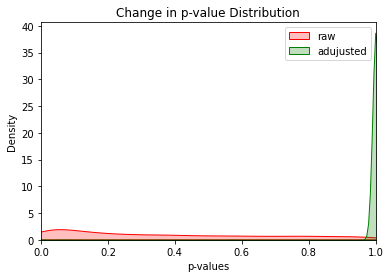

In [5]:
sns.kdeplot(MWUpvallist, color="red", shade=True, label='raw')
ax = sns.kdeplot(correctedpvals, color="green", shade=True, label='adujusted')
ax.set(xlim=(0, 1))
plt.title('Change in p-value Distribution')
plt.xlabel('p-values')
plt.ylabel('Density')
plt.legend(loc = 'best')
plt.show()